In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [16]:
csv = pd.read_csv("imbd_superhero.csv", 
                  header=None, 
                  names=['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare'])
csv.head(3)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458


In [17]:
new_csv = csv[np.isfinite(csv.UnknownColumn)].append(csv[np.isfinite(csv.NrDeSpectatori)])

new_csv.head(5)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1366613.477,240132887


In [4]:
#Normalizam scorurile 
imbd_normalizat = new_csv.IMBD/10 #nota imbd din 10
new_csv.insert(10, 'IMBD_normalizat', imbd_normalizat)

In [5]:
altrating_normalizat = new_csv.AltRating/100 #scorul din 100
new_csv.insert(11, 'AltRating_normalizat', altrating_normalizat)

In [6]:
new_csv.head()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare,IMBD_normalizat,AltRating_normalizat
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545,0.73,0.95
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681,0.67,0.88
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994,0.49,0.24
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902,0.42,0.08
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1366613.477,240132887,0.43,0.16


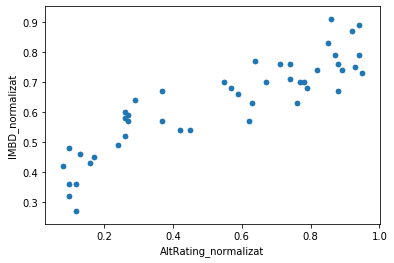

In [7]:
new_csv.plot.scatter(y = 'IMBD_normalizat', x = 'AltRating_normalizat')

In [8]:
new_csv[['IMBD_normalizat', 'AltRating_normalizat']].corr()

,IMBD_normalizat,AltRating_normalizat
IMBD_normalizat,1.00000,0.88836
AltRating_normalizat,0.88836,1.00000


In [9]:
new_csv[['IMBD_normalizat', 'AltRating_normalizat']].describe()

,IMBD_normalizat,AltRating_normalizat
count,92.000000,92.000000
mean,0.630000,0.539783
std,0.152056,0.300465
min,0.270000,0.080000
25%,0.540000,0.260000
50%,0.665000,0.605000
75%,0.740000,0.820000
max,0.910000,0.950000


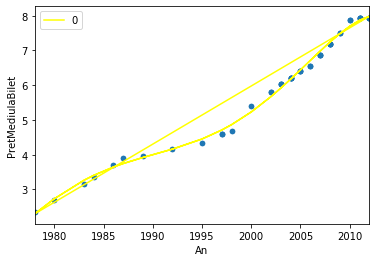

In [10]:
plot = new_csv.plot.scatter(x = 'An', y = 'PretMediulaBilet')
z = np.polyfit(x=new_csv.An, y=new_csv.PretMediulaBilet, deg=5) #polinom de gradul 5 inseamna deg=5
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(new_csv.An), index=new_csv.An)
trendline.plot.line(ax=plot, color='Yellow')

In [11]:
#Definim serie pandas 
series = csv.iloc[:, :]
print(series.head(10)) 

     An                             Titlu Organizatia  IMBD  AltRating  DataX  \
0  1978                          Superman          DC   7.3         95   84.0   
1  1980                       Superman II          DC   6.7         88   77.5   
2  1982                       Swamp Thing          DC   5.3         60   56.5   
3  1983                      Superman III          DC   4.9         24   36.5   
4  1984                         Supergirl          DC   4.2          8   25.0   
5  1986                   Howard the Duck      Marvel   4.3         16   29.5   
6  1987  Superman IV: The Quest for Peace          DC   3.6         10   23.0   
7  1989                            Batman          DC   7.6         71   73.5   
8  1989         The Return of Swamp Thing          DC   3.9         40   39.5   
9  1989                      The Punisher      Marvel   5.4         24   39.0   

   UnknownColumn  PretMediulaBilet  NrDeSpectatori  TopPentruAncutare  
0      7465343.0              2.34  

In [12]:
#Definim DataFrame
dataframe = pd.DataFrame(csv)
dataframe.head(10)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1.366613e+06,240132887
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230
8,1989,The Return of Swamp Thing,DC,3.9,40,39.5,NaN,3.97,NaN,246819230
9,1989,The Punisher,Marvel,5.4,24,39.0,NaN,3.97,NaN,246819230


In [13]:
#filmele de la DC pentru DataFrame-ul new_csv
new_csv.loc[new_csv['Organizatia'] == 'DC']

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare,IMBD_normalizat,AltRating_normalizat
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545,0.73,0.95
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681,0.67,0.88
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994,0.49,0.24
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902,0.42,0.08
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918,0.36,0.10
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230,0.76,0.71
10,1992,Batman Returns,DC,7.0,78,74.0,45687711.0,4.15,1.100909e+07,255029699,0.70,0.78
11,1995,Batman Forever,DC,5.4,42,48.0,52784433.0,4.35,1.213435e+07,262803276,0.54,0.42
12,1997,Batman & Robin,DC,3.6,12,24.0,42872605.0,4.59,9.340437e+06,267783607,0.36,0.12
13,1997,Steel,DC,2.7,12,19.5,870068.0,4.59,1.895573e+05,267783607,0.27,0.12


In [14]:
#Anul si titlu pentru filmele de la Marvel
new_csv.loc[new_csv['Organizatia'] == 'Marvel'][['An','Titlu']]

,An,Titlu
5,1986,Howard the Duck
14,1998,Blade
15,2000,X-Men
16,2002,Blade II
17,2002,Spider-Man
18,2003,Daredevil
19,2003,Hulk
20,2003,X2
21,2004,Blade: Trinity
23,2004,Spider-Man 2


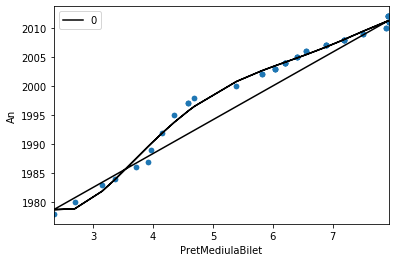

In [18]:
#graficul pentru PretulMediuLaBilet cu Anul pe axa y. Culoarea liniei sa fie neagra.
plot = new_csv.plot.scatter(x = 'PretMediulaBilet', y = 'An')
z = np.polyfit(x=new_csv.PretMediulaBilet, y=new_csv.An, deg=5) #polinom de gradul 5 inseamna deg=5
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(new_csv.PretMediulaBilet), index=new_csv.PretMediulaBilet)
trendline.plot.line(ax=plot, color='Black')

Concluzie: 

    In urma lucrarii de laborator s-a invatat cum se configureaza un mediu Phython pentru Machine Learning. S-a studiat diferenta dintre dataframe si o serie, s-a invatat cum se normalizeaza datele si cum se construesc graficile. 